In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
pd.set_option('display.max_columns',None)
df = pd.read_csv(r'C:\Users\mhija\Desktop\ML_course\DATA\bank-full.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<Axes: xlabel='age', ylabel='Count'>

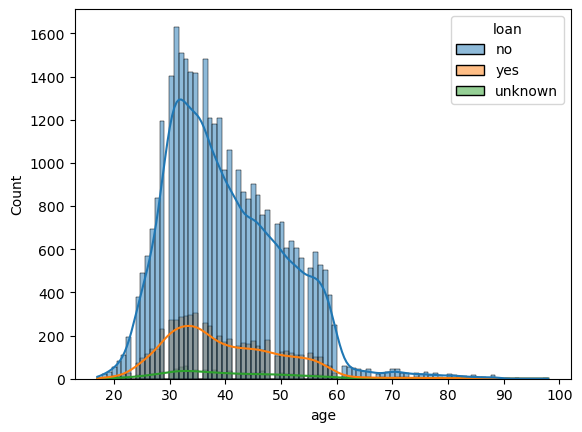

In [8]:
# you can also define the number of bins
sns.histplot(data=df ,x='age',kde=True,hue='loan')

<Axes: xlabel='pdays', ylabel='Count'>

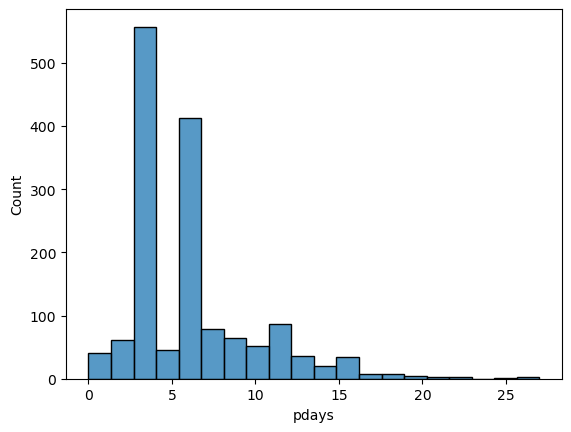

In [9]:
sns.histplot(data=df[df['pdays']!= 999] , x='pdays',bins=20)

In [10]:
df['contact'].value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

<Axes: xlabel='duration', ylabel='Count'>

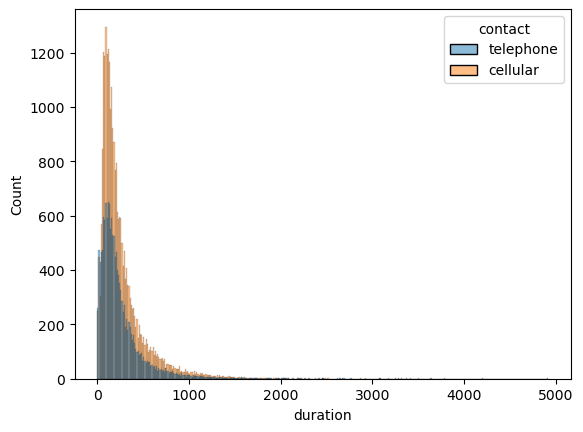

In [11]:
sns.histplot(data=df,x='duration',hue='contact')

C:\Users\mhija\AppData\Local\Temp\ipykernel_23812\414181217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df ,x ='contact',palette='Set2')


<Axes: xlabel='contact', ylabel='count'>

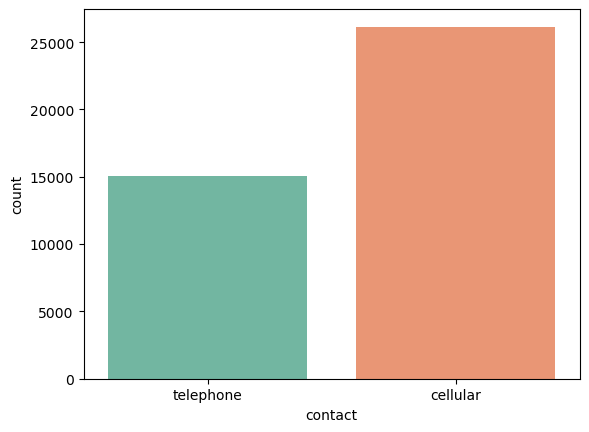

In [12]:
# it dose not matter how you call peopel hist above just got more 
# duration on cellular beacuse majorty of calls were on the celluler
sns.countplot(data=df ,x ='contact',palette='Set2')

<Axes: xlabel='count', ylabel='job'>

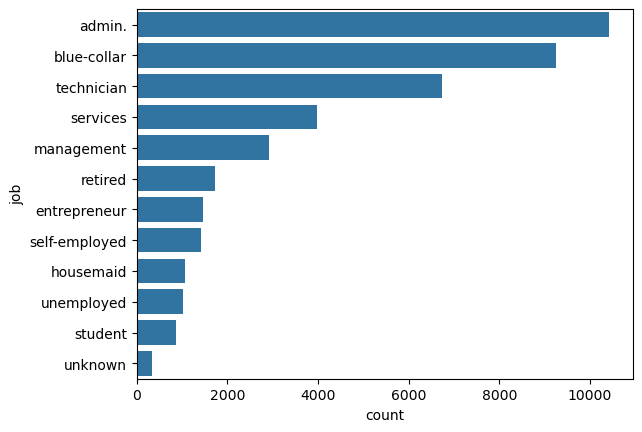

In [13]:
sns.countplot(data=df,y='job',order=df['job'].value_counts().index)

<Axes: xlabel='count', ylabel='education'>

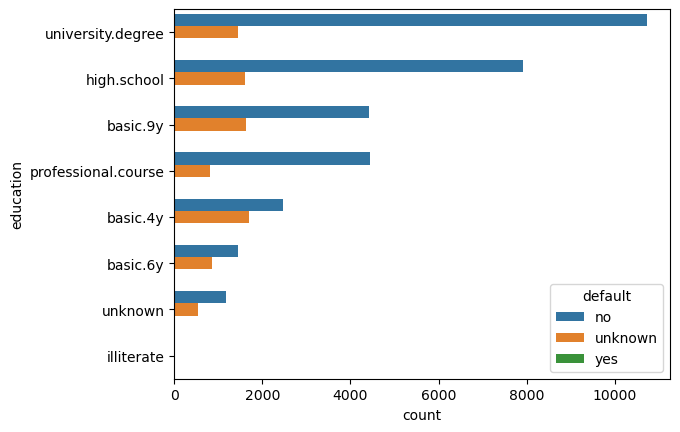

In [14]:
sns.countplot(data=df,y='education',order=df['education'].value_counts().index,hue='default')

In [15]:
df['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [16]:
df['loan'].value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

In [17]:
X = pd.get_dummies(df).astype(int)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [19]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
cluster_labels = model.fit_predict(X_scaled)


In [20]:
X['Cluster'] = cluster_labels

<Axes: >

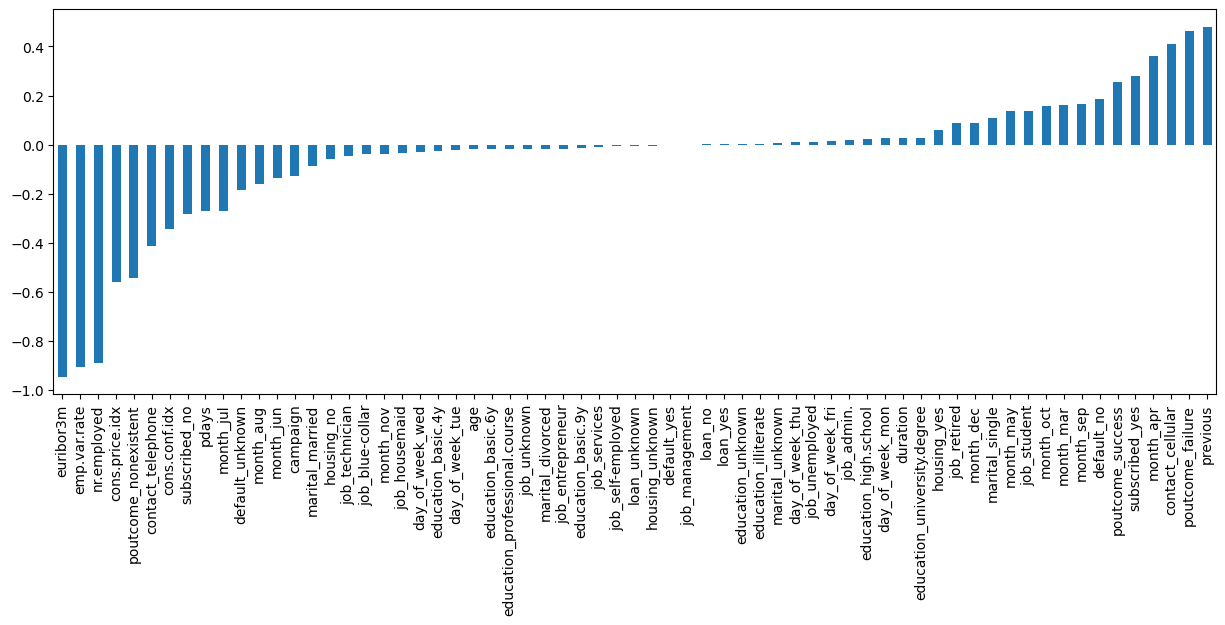

In [21]:
plt.figure(figsize=(15,5))
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind ='bar')

In [22]:
# model.inertia_ = Sum of Squared Distances (SSD), also called within-cluster sum of squares (WCSS).
# It measures how tight the clusters are: the lower, the more compact the clusters.
# Essentially, it’s the sum of squared distances between each point and its cluster center.
ssd = []
for k in range(2,10):
    model =KMeans(n_clusters=k)
    model.fit(X_scaled)

    ssd.append(model.inertia_) #  ssd point --> cluster center
    

 

In [23]:
# This computes difference between consecutive SSD values, i.e., how much improvement each extra cluster gives.
# Large negative numbers → big improvement
# Small negative numbers → adding more clusters doesn’t help much
ssd

[2587828.8047959814,
 2382944.7103042733,
 2359048.8183966745,
 2246046.1306849997,
 2212125.74779926,
 2187931.4169839094,
 2126413.854784825,
 2050066.6555475448]

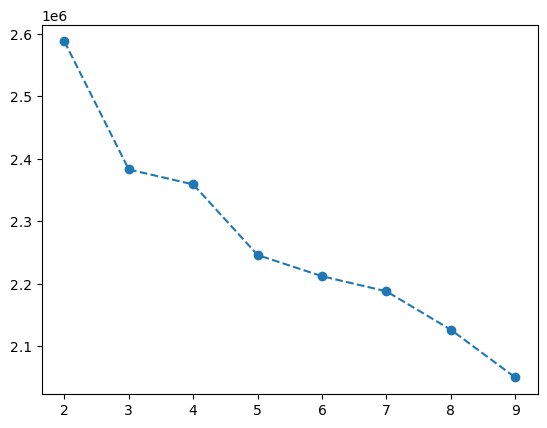

In [24]:
#Look for the “elbow” where the line starts flattening — that’s a good choice for k.
plt.plot(range(2,10),ssd,'o--')

In [25]:
pd.Series(ssd).diff()

0              NaN
1   -204884.094492
2    -23895.891908
3   -113002.687712
4    -33920.382886
5    -24194.330815
6    -61517.562199
7    -76347.199237
dtype: float64

In [ ]:

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Silhouette → higher is better (max 1)
# Davies-Bouldin → lower is better
# Calinski-Harabasz → higher is better

# Silhouette Score
# Measures how similar an object is to its own cluster vs other clusters.
# Range: -1 to 1
# 1 → very well clustered, -1 → probably in the wrong cluster.



# Silhouette Score
sil_score = silhouette_score(X, cluster_labels)
print("Silhouette Score:", sil_score)

# Davies-Bouldin Index
dbi = davies_bouldin_score(X, cluster_labels)
print("Davies-Bouldin Index:", dbi)

# Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X, cluster_labels)
print("Calinski-Harabasz Index:", ch_score)


Silhouette Score: 0.22066128678870714
Davies-Bouldin Index: 2.7200996525071903
Calinski-Harabasz Index: 2753.893735321287
